# Linear Regression

## Articles used:
- [Introduction to Linear Regression in Python](https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0)

Linear regression is a basic predictive analytics technique that uses historical data to predict an output variable.

The basic idea is that if we can fit a linear regression model to observed data, we can then use the model to predict any future values. For example, let’s assume that we have found from historical data that the price (P) of a house is linearly dependent upon its size (S) — in fact, we found that a house’s price is exactly 90 times its size. The equation will look like this:
<br><br>
<b>P = 90 x S</b>
<br><br>
With this model, we can then predict the cost of any house. If we have a house that is 1,500 square feet, we can calculate its price to be:
<br><br>
<b>P = 90 x 1500 = $135,000</b>


## 1. Basic concepts and mathematics

There are two kinds of variables in a linear regression model:
The <b>input or predictor variable</b> is the variable(s) that help predict the value of the output variable. It is commonly referred to as ${X}$.
<br>
The <b>output variable</b> is the variable that we want to predict. It is commonly referred to as ${Y}$.
<br>
To estimate Y using linear regression, we assume the equation:

<center></b>$Y_e = \alpha + \beta X$</b></center>

where <b>$Y_e$ is the estimated or predicted value of $Y$ based on our linear equation.</b>
<br>
Our goal is to find statistically significant values of the parameters $\alpha$ and $\beta$ that minimise the difference between $Y$ and $Y_e$. (See green lines): <br>
![Green lines show the difference between actual values Y and estimate values Yₑ
](../resources/images/articles/differencebetweenactualvaluesYandestimatevaluesY.png)
<br>
If we are able to determine the optimum values of these two parameters, then we will have the line of best fit that we can use to predict the values of $Y$, given the value of $X$.
<b>To estimate $\alpha$ and $\beta$ We can use a method called ordinary least squares.</b>
<br>
The objective of the least squares method is to find values of $\alpha$ and $\beta$ that minimise the sum of the squared difference between $Y$ and $Y_e$. 

<center>
<b>
$\beta = \frac{
    \sum_{i=1}^{n} (X_i - \overline{X})(Y_i - \overline{Y})
}{
    \sum_{i=1}^{n} (X_i - \overline{X})^2
}$
</b>
</center>
<br>
<center>
<b>
$\alpha = \overline{Y} - \beta * \overline{X}$
</b>
</center>
<br>
<center>
<b>
$\beta = \frac{Cov(X, Y)}{Var(X)}$
</b>
</center>


where $\overline{X}$ is the mean of $X$ values and $\overline{Y}$ is the mean of $Y$ values.
<br>


<hr>

In [1]:
# Standard imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# 2. Linear Regression code:

Code below consist of:
- Linear Regression from scratch
- Linear Regression using statsmodels
- Linear Regression using scikit-learn

## 2.1 Linear Regression From Scratch

In [2]:
# Generate'random' data
np.random.seed(0)

mean, stdev = 1.5, 2.5
X = stdev * np.random.randn(100) + mean # Array of some 100 values
res = 0.5 * np.random.randn(100)        # 100 residual terms
y = 2 + 0.3 * X + res                   # Actual values of Y

# Pandas dataframe
df = pd.DataFrame(
    {
        'X': X,
        'y': y
    }
)

# First five rows
df.head()

,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


In [3]:
# To estimate y using ordinary least squares
# w need to calculate:
# - mean of X
# - mean of y
# - covariance of X and y
# - variance of X
# before we can calculate alpha and beta

x_mean, y_mean = np.mean(X), np.mean(y)
cov = (df['X'] - x_mean) * (df['y'] - y_mean)
var = (df['X'] - x_mean)**2
beta = np.sum(cov) / np.sum(var)
alpha = y_mean - (beta * x_mean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 2.0031670124623426
beta = 0.3229396867092763


With estimated $\alpha$ and $\beta$ model will look like:
<br>
<center></b>$Y_e = 2.003 + 0.322X$</b></center>

In [4]:
# Predicted values
y_pred = alpha + beta * X
y_pred

array([3.91178282, 2.81064315, 3.27775989, 4.29675991, 3.99534802,
       1.69857201, 3.25462968, 2.36537842, 2.40424288, 2.81907292,
       2.60387001, 3.66168312, 3.10199975, 2.58581077, 2.84592918,
       2.75696825, 3.69382011, 2.32194218, 2.74033151, 1.79802302,
       0.42642221, 3.015275  , 3.18547843, 1.88839019, 4.32006116,
       1.31339555, 2.52451965, 2.33645381, 3.72506464, 3.67386219,
       2.61267323, 2.79288576, 1.77082341, 0.88838207, 2.20668994,
       2.61380476, 3.48085076, 3.45831697, 2.17486854, 2.24351265,
       1.64102813, 1.34112617, 1.11002064, 4.06253353, 2.07610925,
       2.1338976 , 1.47613319, 3.11528277, 1.18459738, 2.31582084,
       1.76462232, 2.79994197, 2.07517841, 1.53439407, 2.46482364,
       2.83338994, 2.54127917, 2.73177699, 1.9754571 , 2.19471775,
       1.94466613, 2.19729158, 1.83108353, 1.09386364, 2.6308214 ,
       2.16319902, 1.17143718, 2.86120343, 1.75506992, 2.52951462,
       3.07620724, 2.59171079, 3.40747079, 1.49064088, 2.81240

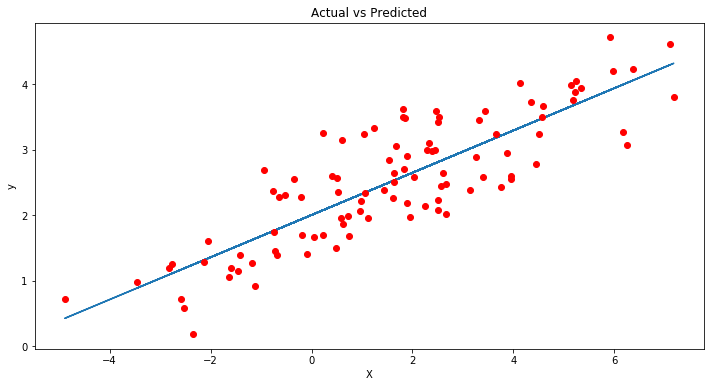

In [5]:
# plot prediction ypred against the actual values of y
plt.figure(figsize=(12,6))
plt.plot(X, y_pred)
plt.plot(X, y, 'ro')
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

The blue line is line of <b>best fit of model.</b> <br>
We can see from this graph that there is a positive linear relationship between $X$ and $y$.<br>
Using model, we can predict $y$ from any values of $X$ <br>
For example, if a value $X = 10$ that:<br>
<center><b>$Y_e = 2.003 + 0.323 (10) = 5.233$</b></center>

## 2.2 Linear Regression with statsmodels

In [6]:
# TASK: Find if TV advertising spending can predict
#       the number of sales for the product.

advertising = pd.read_csv('../resources/data/kaggle_advertising.csv')
advertising.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using statsmodel
# This takes the formula y ~ X, where X is the predictor variable
# (TV advertising costs) and y is the output variable (Sales)
model = smf.ols('Sales ~ TV', data=advertising)
model = model.fit()
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

$\alpha$ is the <b>intercept</b> and $\beta$ is the <b>slope</b> i.e. <br>
$\alpha = 7.032$ and $\beta = 0.047$
<br>
The equation for the model will be: 
<center><b>Sales = 7.032 + 0.047*TV</b></center>
<br>
This means that, on average, if we spent $100 on TV advertising, we should expect to sell 11.73 units.


<Figure size 432x288 with 0 Axes>

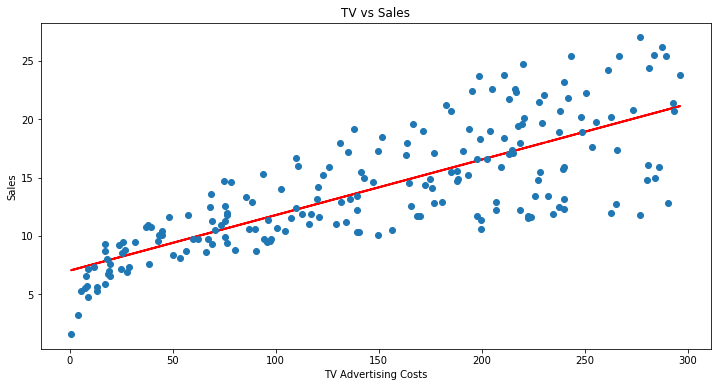

In [8]:
# make prediction
sales_pred = model.predict()

# Clear old plot
plt.clf()

# plot prediction ypred against the actual values of y
plt.figure(figsize=(12,6))
plt.plot(advertising['TV'], sales_pred, 'r',linewidth=2)
plt.plot(advertising['TV'], advertising['Sales'], 'o')
plt.title('TV vs Sales')
plt.xlabel('TV Advertising Costs')
plt.ylabel('Sales')
plt.show()

In [9]:
# If we increase TV advertising costs to $400,
# we can predict that sales will increase to 26 units:
new_X = 400
model.predict({"TV": new_X})

0    26.04725
dtype: float64

## 2.3 Multiple Linear Regression with scikit-learn

For this model, we will continue to use the advertising dataset but 
this time we will use two predictor variables to create a multiple linear regression model. This is simply a linear regression model with more than one predictor, and is modelled by:

<center><b>$Y_e =  \alpha + \beta_1 X_1 + \beta_2 X_2 ... + \beta_n X_n$</b></center>

Predicting Sales using the variables TV and Radio:

<center><b>$Sales =  \alpha + \beta_1 * TV + \beta_2 * Radio ... + \beta_n X_n$</b></center>

In [17]:
from sklearn.linear_model import LinearRegression

predictors = ['TV', 'Radio']
X = advertising[predictors]
y = advertising['Sales']

lr = LinearRegression()
model = lr.fit(X,y)

print(f'alpha = {model.intercept_}')
print(f'beta = {model.coef_}')

alpha = 2.9210999124051362
beta = [0.04575482 0.18799423]


<center><b>Sales = 2.921 + 0.046*TV + 0.1880*Radio.</b></center>

In [20]:
# if we wanted to know how many sales we would make if we invested $300 
# in TV advertising and $200 in Radio advertising

new_X = [[300,200]]
model.predict(new_X)

array([54.24638977])